In [13]:
import torch
import pickle
import matplotlib.pyplot as plt

In [15]:
broken_img = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
broken_img.shape

torch.Size([10000])

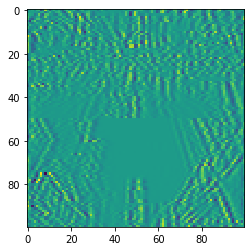

In [17]:
plt.imshow(broken_img.view(100,100))

In [18]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [29]:
#Euclidean dist
def dist_loss(hypothesis, input):
    return torch.dist(hypothesis, input)

In [39]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [41]:
lr = 0.8

In [42]:
for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = dist_loss(hypothesis, broken_img)
    loss.backward()
    
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
        
    if i % 1000 == 0:
        print(f'loss {i} = {loss.item()}')

loss 0 = 12.277872085571289
loss 1000 = 1.1308118104934692
loss 2000 = 0.5335164666175842
loss 3000 = 0.3723418116569519
loss 4000 = 0.29480254650115967
loss 5000 = 0.2464747279882431
loss 6000 = 0.2117355912923813
loss 7000 = 0.1842837631702423
loss 8000 = 0.1611136794090271
loss 9000 = 0.14064016938209534
loss 10000 = 0.12195828557014465
loss 11000 = 0.10452157258987427
loss 12000 = 0.08798240125179291
loss 13000 = 0.07211299985647202
loss 14000 = 0.05675908923149109
loss 15000 = 0.041813258081674576
loss 16000 = 0.02720227837562561
loss 17000 = 0.02115849032998085
loss 18000 = 0.021166009828448296
loss 19000 = 0.02116730995476246


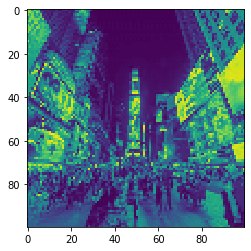

In [43]:
plt.imshow(random_tensor.view(100,100))